# ***Titanic Survival Prediction  -  CodeSoft Internship 1***

# #This notebook contains the solution for predicting Titanic survival using machine learning models like Decision Tree and Random Forest. All steps are written and explained based on my understanding.

# *By:- Shaheen Bano*





## *Import necessary libraries...*

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


##   *Load the dataset....*

In [37]:
data = pd.read_csv("Titanic-Dataset.csv")
data.columns = data.columns.str.strip()     # remove trailing spaces if any
print(" Data Loaded!")

 Data Loaded!


## *View top 5 rows...*

In [38]:
print("First 5 raws of data:")
print(data.head())

First 5 raws of data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

# *Check basic info*

In [39]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## *Check Columns & Missing Values*

In [40]:
print("Columns:", data.columns.tolist())
print("\nMissing Values:\n", data.isnull().sum())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## *Clean the data...*
### #Drop columns that are not useful for prediction.



In [41]:
for col in ['Name', 'Ticket', 'Cabin']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

data.dropna(subset=['Age', 'Embarked'], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

/tmp/ipython-input-1503783566.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data['Fare'].median(), inplace=True)


##  *Convert text into numbers (because ML works on numbers)*

In [43]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

### *Visualization Section (before modeling).....*

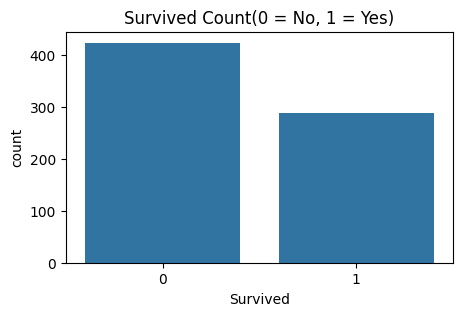

In [44]:
plt.figure(figsize=(5,3))
sns.countplot(x='Survived', data=data)
plt.title('Survived Count(0 = No, 1 = Yes)')
plt.savefig("survived_count.png")  # ✅ This line saves the plot as an image
plt.show()

In [45]:
from google.colab import files
files.download("survived_count.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

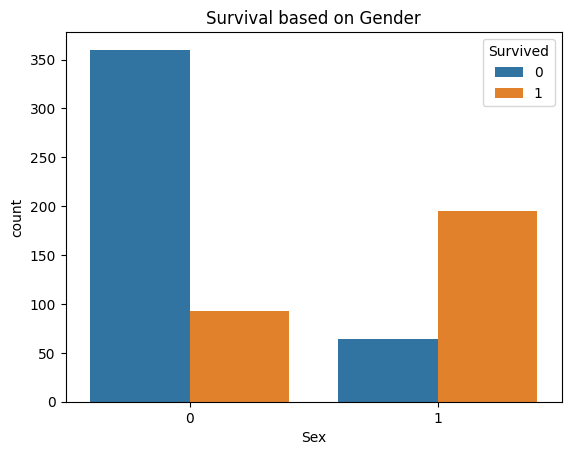

In [46]:
#Let's see survival rate by gender..
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival based on Gender')
plt.savefig("survived_gender.png")
plt.show()



In [32]:
from google.colab import files
files.download("survived_gender.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

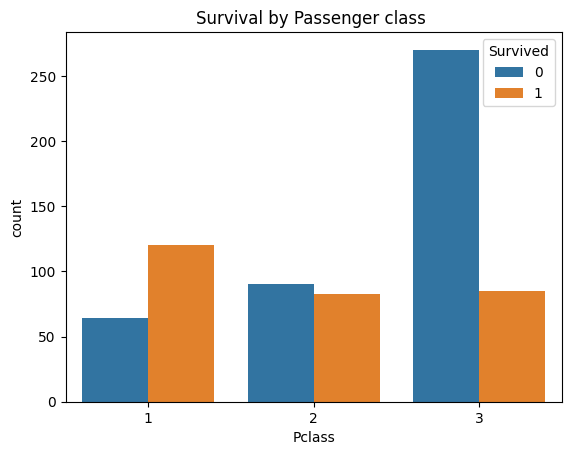

In [47]:
#Checking class wise survival..
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger class ')
plt.show()

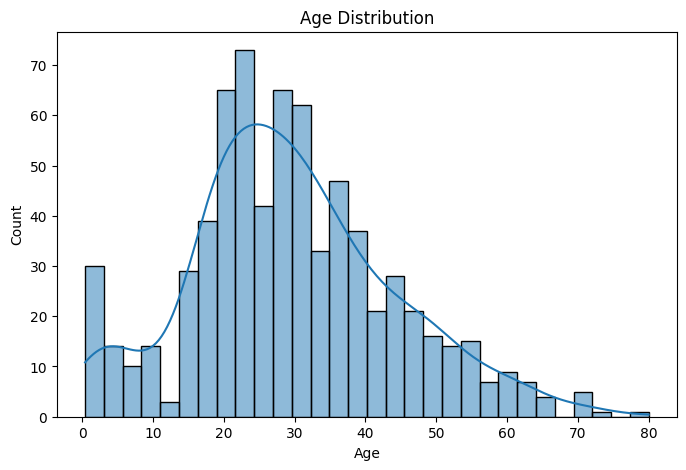

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig("age_distribution.png")
plt.show()

In [35]:
from google.colab import files
files.download("age_distribution.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

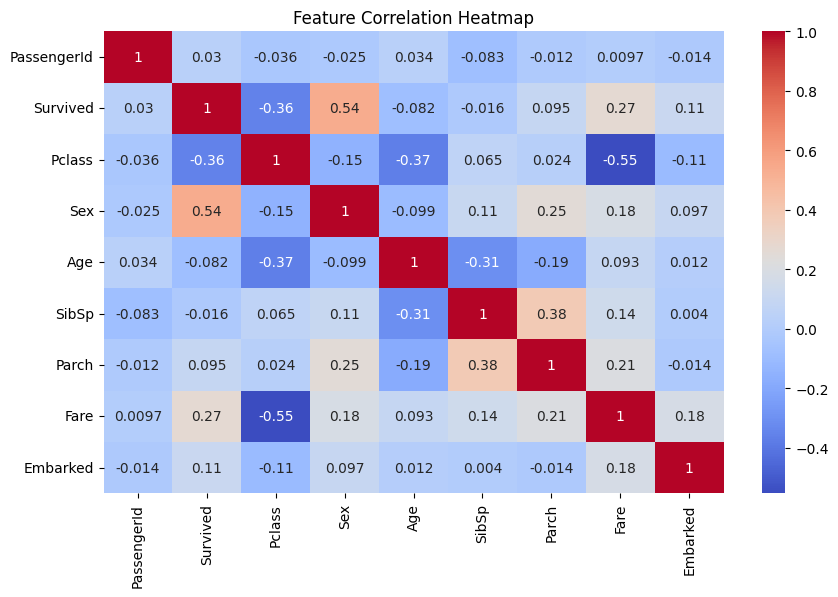

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


##  *Select features and label*

In [50]:
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']


##  *Split the data into training and testing parts*

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## *Create the machine learning model*

*Logistic Regression*

In [52]:
print("Logistic Regression")
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression
Accuracy: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 *Decision Tree*

In [53]:
print("Decision Tree")
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

Decision Tree
Decision Tree Accuracy: 0.7202797202797203
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        80
           1       0.70      0.63      0.67        63

    accuracy                           0.72       143
   macro avg       0.72      0.71      0.71       143
weighted avg       0.72      0.72      0.72       143



*Random Forest*

In [54]:
print("Training Random Forest....")
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

Training Random Forest....
Random Forest Accuracy: 0.7832167832167832
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.77      0.73      0.75        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



##  *Measure accuracy of the model...*

In [55]:
print("Final Accuracy Comparison:")
print("Logistic Regression: ", accuracy_score(y_test, log_pred))
print("Decision Tree : ", accuracy_score(y_test, tree_pred))
print("Random Forest : ", accuracy_score(y_test, forest_pred))

Final Accuracy Comparison:
Logistic Regression:  0.7972027972027972
Decision Tree :  0.7202797202797203
Random Forest :  0.7832167832167832


# ***Conclusion***

I explored the Titanic dataset, cleaned it, visualized some important relationships, and used Decision Tree and Random Forest models to predict survival. I got good accuracy from RandomForestClassifier.

This project helped me understand real-world ML project workflow. Thanks to CodSoft for the opportunity!

# — Shaheen Bano